## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


## Load Trader (Hyperliquid) Dataset

In [34]:
df=pd.read_csv("dataset/historical_data.csv")
df.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
df1=pd.read_csv("dataset/fear_greed_index.csv")
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [37]:
df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [18]:
df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

## Convert Timestamp to Date

In [19]:
df['Timestamp IST'] = pd.to_datetime(
    df['Timestamp IST'], format='%d-%m-%Y %H:%M'
)

df['Date'] = df['Timestamp IST'].dt.date


## Aggregate Data


In [21]:
df_agg = (
    df.groupby(
        ['Order ID', 'Account', 'Coin', 'Date', 'Side', 'Direction'],
        as_index=False
    )
    .agg({
        'Size Tokens': 'sum',
        'Size USD': 'sum',
        'Fee': 'sum',
        'Execution Price': 'mean',
        'Closed PnL': 'sum'
    })
)


In [31]:
df_agg.head()

,Order ID,Account,Coin,Date,Side,Direction,Size Tokens,Size USD,Fee,Execution Price,Closed PnL,Trade_Type
0,173271100,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,2023-05-01,BUY,Open Long,0.25130,477.00,0.000000,1898.133333,0.000000,OPEN
1,4064960965,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2023-12-05,BUY,Open Long,11.21190,25007.21,6.251800,2230.242857,0.000000,OPEN
2,4064974623,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,2023-12-05,SELL,Open Short,0.59711,24998.62,6.249655,41866.500000,0.000000,OPEN
3,4626056690,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,2023-12-14,BUY,Close Short,0.59711,25525.84,6.381460,42748.500000,-527.233130,CLOSE
4,4626057386,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2023-12-14,SELL,Close Long,11.21190,25252.56,6.313140,2252.300000,245.428491,CLOSE


In [24]:
df.shape

(211224, 17)

## Identify Closed Trades


In [25]:
df_agg['Trade_Type'] = df_agg['Closed PnL'].apply(
    lambda x: 'CLOSE' if x != 0 else 'OPEN'
)

df_closed = df_agg[df_agg['Trade_Type'] == 'CLOSE'].copy()


In [40]:
df_closed.head()

,Order ID,Account,Coin,Date,Side,Direction,Size Tokens,Size USD,Fee,Execution Price,Closed PnL,Trade_Type,Win,Net PnL
3,4626056690,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,2023-12-14,BUY,Close Short,0.59711,25525.84,6.381460,42748.50000,-527.233130,CLOSE,0,-533.614590
4,4626057386,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2023-12-14,SELL,Close Long,11.21190,25252.56,6.313140,2252.30000,245.428491,CLOSE,1,239.115351
6,4684765672,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,AAVE,2023-12-14,SELL,Close Long,261.24000,25957.99,6.489496,99.36300,76.369902,CLOSE,1,69.880406
8,4686611728,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,JTO,2023-12-15,BUY,Close Short,3558.00000,10609.95,2.652489,2.98200,-24.632034,CLOSE,0,-27.284523
10,4790465624,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,PYTH,2023-12-17,SELL,Close Long,39897.00000,15649.65,3.912410,0.39225,300.909537,CLOSE,1,296.997127


## Performance Metrics (WIN =1 , LOSS=0)

In [42]:
df_closed['Win'] = (df_closed['Closed PnL'] > 0).astype(int)
df_closed['Net PnL'] = df_closed['Closed PnL'] - df_closed['Fee']


In [56]:
df_closed.head()

,Order ID,Account,Coin,Date,Side,Direction,Size Tokens,Size USD,Fee,Execution Price,Closed PnL,Trade_Type,Win,Net PnL
3,4626056690,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,2023-12-14,BUY,Close Short,0.59711,25525.84,6.381460,42748.50000,-527.233130,CLOSE,0,-533.614590
4,4626057386,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2023-12-14,SELL,Close Long,11.21190,25252.56,6.313140,2252.30000,245.428491,CLOSE,1,239.115351
6,4684765672,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,AAVE,2023-12-14,SELL,Close Long,261.24000,25957.99,6.489496,99.36300,76.369902,CLOSE,1,69.880406
8,4686611728,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,JTO,2023-12-15,BUY,Close Short,3558.00000,10609.95,2.652489,2.98200,-24.632034,CLOSE,0,-27.284523
10,4790465624,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,PYTH,2023-12-17,SELL,Close Long,39897.00000,15649.65,3.912410,0.39225,300.909537,CLOSE,1,296.997127


## Load Fear & Greed Index Dataset

In [44]:
df1 = pd.read_csv("dataset/fear_greed_index.csv")
df1.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
df1.info

<bound method DataFrame.info of                                            Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010

In [50]:
df1.isnull().sum()

Date               0
Sentiment_Class    0
Sentiment_Score    0
Sentiment          0
dtype: int64

## Clean /  Rename data

In [45]:
df1['date'] = pd.to_datetime(df1['date']).dt.date

df1 = df1[['date', 'classification', 'value']]

df1.rename(columns={
    'date': 'Date',
    'classification': 'Sentiment_Class',
    'value': 'Sentiment_Score'
}, inplace=True)


## Normalize data (Fear vs Greed)

In [46]:
df1['Sentiment'] = df1['Sentiment_Class'].replace({
    'Extreme Fear': 'Fear',
    'Fear': 'Fear',
    'Greed': 'Greed',
    'Extreme Greed': 'Greed'
})
df1.head()

,Date,Sentiment_Class,Sentiment_Score,Sentiment
0,2018-02-01,Fear,30,Fear
1,2018-02-02,Extreme Fear,15,Fear
2,2018-02-03,Fear,40,Fear
3,2018-02-04,Extreme Fear,24,Fear
4,2018-02-05,Extreme Fear,11,Fear


## Merge Dataset 

In [51]:
final_df = pd.merge(
    df_closed,
    df1,
    on='Date',
    how='left'
)

final_df = final_df.dropna(subset=['Sentiment'])
final_df.head()

,Order ID,Account,Coin,Date,Side,Direction,Size Tokens,Size USD,Fee,Execution Price,Closed PnL,Trade_Type,Win,Net PnL,Sentiment_Class,Sentiment_Score,Sentiment
0,4626056690,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,2023-12-14,BUY,Close Short,0.59711,25525.84,6.381460,42748.50000,-527.233130,CLOSE,0,-533.614590,Greed,72.0,Greed
1,4626057386,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2023-12-14,SELL,Close Long,11.21190,25252.56,6.313140,2252.30000,245.428491,CLOSE,1,239.115351,Greed,72.0,Greed
2,4684765672,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,AAVE,2023-12-14,SELL,Close Long,261.24000,25957.99,6.489496,99.36300,76.369902,CLOSE,1,69.880406,Greed,72.0,Greed
3,4686611728,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,JTO,2023-12-15,BUY,Close Short,3558.00000,10609.95,2.652489,2.98200,-24.632034,CLOSE,0,-27.284523,Greed,70.0,Greed
4,4790465624,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,PYTH,2023-12-17,SELL,Close Long,39897.00000,15649.65,3.912410,0.39225,300.909537,CLOSE,1,296.997127,Greed,73.0,Greed


In [52]:
final_df.groupby('Sentiment')['Net PnL'].mean()


Sentiment
Fear       894.138502
Greed      357.364701
Neutral    459.384574
Name: Net PnL, dtype: float64

## Performance Analysis


Compares average profit during Fear vs Greed

In [53]:
final_df.groupby('Sentiment')['Win'].mean() * 100


Sentiment
Fear       82.768549
Greed      77.201304
Neutral    82.574114
Name: Win, dtype: float64

Win Rate Analysis


In [61]:
final_df.groupby('Sentiment')['Win'].mean() * 100


Sentiment
Fear       82.768549
Greed      77.201304
Neutral    82.574114
Name: Win, dtype: float64

Trade Size Behavior Analysis

In [54]:
final_df.groupby('Sentiment')['Size USD'].mean()


Sentiment
Fear       65689.663001
Greed      14570.922852
Neutral    36479.442043
Name: Size USD, dtype: float64

## Visualization

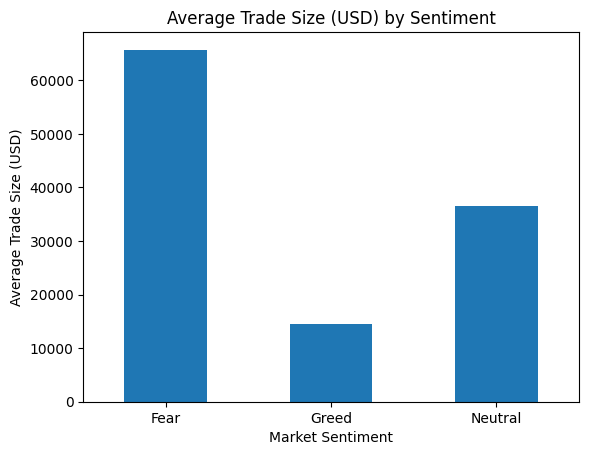

In [57]:
avg_size = final_df.groupby('Sentiment')['Size USD'].mean()

avg_size.plot(kind='bar')
plt.title("Average Trade Size (USD) by Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=0)
plt.show()


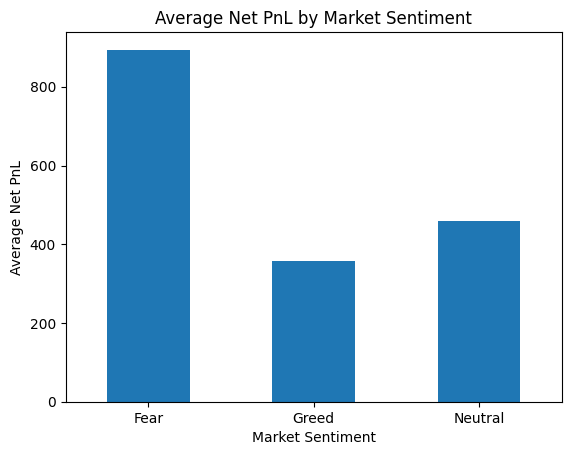

In [58]:
import matplotlib.pyplot as plt

avg_pnl = final_df.groupby('Sentiment')['Net PnL'].mean()

avg_pnl.plot(kind='bar')
plt.title("Average Net PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Net PnL")
plt.xticks(rotation=0)
plt.show()


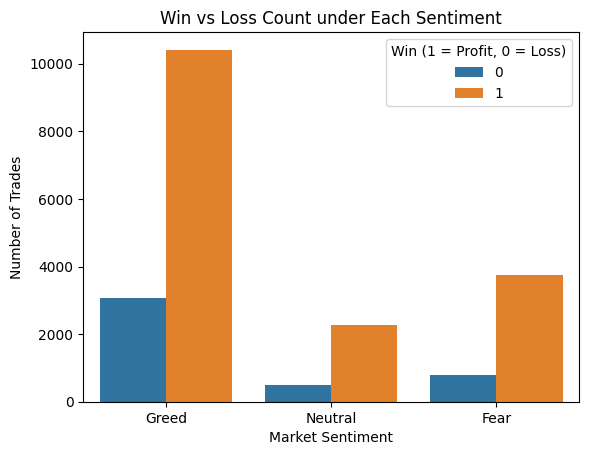

In [59]:
sns.countplot(x='Sentiment', hue='Win', data=final_df)
plt.title("Win vs Loss Count under Each Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.legend(title="Win (1 = Profit, 0 = Loss)")
plt.show()


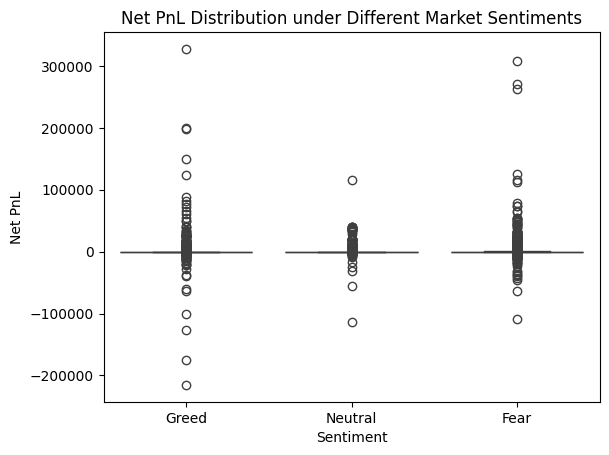

In [60]:
sns.boxplot(x='Sentiment', y='Net PnL', data=final_df)
plt.title("Net PnL Distribution under Different Market Sentiments")
plt.show()
